In [ ]:
# word to vector embeddings

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

# constants
PATH = '/content/sample_data/shakespeare.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')
# nltk.download('punkt')
# nltk.download('stopwords')

# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [5]:
# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]

def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of
    lines.

    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove

    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''

    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res

filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [8]:
print(len(filtered_lines))

111396


In [6]:
filtered_lines

[['act'],
 ['scene', 'london', 'palace'],
 ['enter',
  'king',
  'henry',
  'lord',
  'john',
  'lancaster',
  'earl',
  'westmoreland',
  'sir',
  'walter',
  'blunt',
  'others'],
 ['shaken', 'wan', 'care'],
 ['find', 'time', 'frighted', 'peace', 'pant'],
 ['breathe', 'shortwinded', 'accents', 'new', 'broils'],
 ['commenced', 'strands', 'afar', 'remote'],
 ['thirsty', 'entrance', 'soil'],
 ['shall', 'daub', 'lips', 'childrens', 'blood'],
 ['shall', 'trenching', 'war', 'channel', 'fields'],
 ['bruise', 'flowerets', 'armed', 'hoofs'],
 ['hostile', 'paces', 'opposed', 'eyes'],
 ['like', 'meteors', 'troubled', 'heaven'],
 ['one', 'nature', 'one', 'substance', 'bred'],
 ['lately', 'meet', 'intestine', 'shock'],
 ['furious', 'close', 'civil', 'butchery'],
 ['shall', 'mutual', 'wellbeseeming', 'ranks'],
 ['march', 'one', 'way', 'opposed'],
 ['acquaintance', 'kindred', 'allies'],
 ['edge', 'war', 'like', 'illsheathed', 'knife'],
 ['shall', 'cut', 'master', 'therefore', 'friends'],
 ['far', '

In [14]:
w = w2v(
    filtered_lines,
    min_count=3,
    sg = 1,
    window=7
)

print(w.wv.most_similar('thou'))
print(w.wv.most_similar('simple'))


emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head(10)

[('art', 0.8462211489677429), ('thyself', 0.8341688513755798), ('villain', 0.7938315272331238), ('dost', 0.7848742604255676), ('wherefore', 0.7435012459754944), ('kill', 0.739343523979187), ('didst', 0.7319019436836243), ('wilt', 0.7258813977241516), ('traitor', 0.6997151970863342), ('canst', 0.6964321136474609)]
[('gentlewoman', 0.9727627038955688), ('robert', 0.9700589776039124), ('eglamour', 0.9633179903030396), ('wisely', 0.962209165096283), ('youngest', 0.9616047143936157), ('arrested', 0.9596319198608398), ('reported', 0.9593071937561035), ('topas', 0.9590207934379578), ('bawd', 0.9588640928268433), ('follows', 0.9585927128791809)]
(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,0.066000,-0.059792,0.511118,0.725199,-0.490738,-0.505853,0.311951,0.467605,-0.349890,-0.252738,...,0.315085,0.067066,0.371127,0.228557,1.033147,0.656478,-0.509922,-0.563534,0.017113,0.375629
thy,-0.023153,0.357328,0.441329,0.348417,-0.029519,-0.268157,0.167212,0.715251,0.031669,-0.343403,...,0.134038,-0.091712,0.482364,-0.412124,0.402376,0.285740,-0.263491,-0.360986,-0.106595,0.062042
shall,0.023324,0.215405,0.123381,0.137549,0.471821,-0.042890,0.108055,0.339897,-0.281356,0.058925,...,0.598858,0.003462,0.125629,-0.119822,0.563679,0.085894,0.175146,0.039214,0.391556,0.069349
thee,-0.193198,0.186607,0.480383,0.359606,0.137102,-0.026929,0.244956,0.665260,-0.155375,-0.255845,...,0.337662,0.117670,0.139552,-0.093334,0.701113,0.345543,0.013901,-0.058709,0.209845,0.036696
good,-0.042589,0.231841,0.247971,-0.033901,-0.019301,0.061391,0.185806,0.562059,-0.088549,-0.107979,...,0.307124,-0.093405,0.353651,0.021845,0.571332,-0.057742,0.175880,-0.093976,0.264004,-0.213112
lord,-0.203246,-0.040867,0.072027,0.079761,-0.153862,-0.055754,0.436424,0.549143,-0.241721,-0.210392,...,0.572689,0.122816,-0.119988,0.078860,0.581033,0.026536,0.182586,-0.036751,0.220213,-0.161259
come,0.195963,0.073070,0.190441,-0.036037,0.054193,-0.099473,0.304811,0.242616,-0.472262,-0.152463,...,0.263143,-0.003627,0.257960,0.062983,0.497135,0.214456,0.397434,-0.166931,0.114260,0.192735
sir,0.051890,0.085428,0.200472,0.433925,0.016686,0.035561,0.559788,0.371881,-0.742458,-0.156153,...,0.546476,0.123077,-0.297310,-0.043026,0.335315,0.150277,0.284007,-0.178228,0.258978,-0.225653
well,-0.434280,0.607874,0.141942,0.137765,0.113354,0.000992,0.631627,0.341570,-0.257930,-0.175088,...,0.320759,0.065175,0.307170,-0.013825,0.787603,0.261699,0.232911,0.196070,0.134786,0.041941
would,-0.275275,0.354871,0.044015,0.106796,0.222928,-0.242069,-0.067698,0.655125,-0.297914,-0.181534,...,0.493853,0.025609,-0.023695,-0.025965,0.735433,0.136065,0.016429,0.074518,0.479266,0.462014


[]

<Figure size 640x480 with 0 Axes>

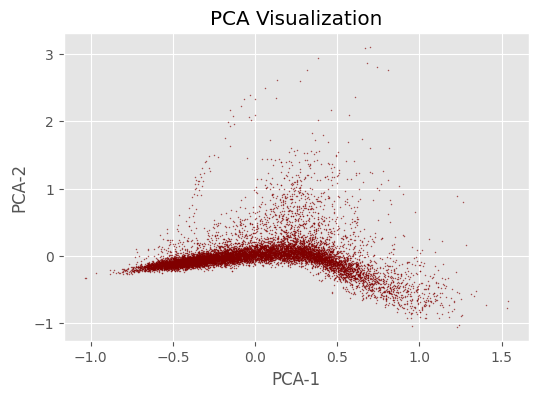

In [12]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()